In [1]:
##This is the first python code file used for Ethical Princiles comparison, making use of the AIML techniques.

# 1. Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# URL of the CSV file
url = "https://github.com/shindesagarm/Ethically_Responsible_Machine_Learning_in_Fintech/blob/main/explainability_notebook/cc_dataset.csv?raw=true"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

## Data Loading

In [3]:
# Read the data file
dataset = pd.read_csv(url)
# Replace "?" with NaN
dataset.replace('?', np.nan, inplace = True)
# Convert Age to numeric
dataset["Age"] = pd.to_numeric(dataset["Age"])
# dataset2 = dataset[:,:]
dataset2 = dataset.copy()

In [4]:
dataset.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [5]:
dataset.isnull().sum()

,0
Male,12
Age,12
Debt,0
Married,6
BankCustomer,6
EducationLevel,9
Ethnicity,9
YearsEmployed,0
PriorDefault,0
Employed,0


## Data Preparation

In [6]:
# Replace missing values for numerical columns with their mean value
#dataset.fillna(dataset.mean(), inplace=True)
import pandas as pd

# Fill missing values for numerical columns with their mean value
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Fill missing values for non-numerical columns with a placeholder (e.g., 'missing')
non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
dataset[non_numeric_cols] = dataset[non_numeric_cols].fillna('missing')

In [7]:
dataset.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,0,0,-


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


<Axes: xlabel='Approved', ylabel='count'>

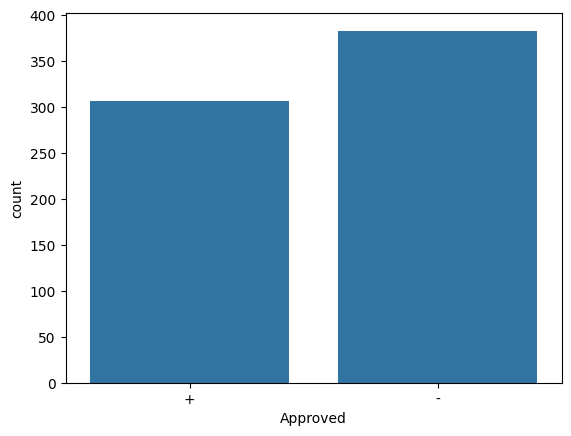

In [9]:
sns.countplot(data = dataset, x = 'Approved')

In [10]:
dataset.isnull().sum()

,0
Male,0
Age,0
Debt,0
Married,0
BankCustomer,0
EducationLevel,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [11]:
print("The shape of the data is: ", dataset.shape)

The shape of the data is:  (690, 16)


In [12]:
def replaceWithMode(df):
    """
    Replace missing values in categorical colums with their most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
replaceWithMode(dataset)

In [13]:
dataset.isnull().sum()

,0
Male,0
Age,0
Debt,0
Married,0
BankCustomer,0
EducationLevel,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [14]:
# Using a label encoder to convert categorical colums into numeric types
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataset:
    if dataset[col].dtypes=='object':
        dataset[col]=le.fit_transform(dataset[col])

In [15]:
dataset.tail(15)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
675,0,41.58,1.040,2,0,0,8,0.665,0,0,0,0,0,61,237,1
676,0,30.58,10.665,2,0,11,3,0.085,0,1,12,1,0,11,3,1
677,1,19.42,7.250,2,0,9,8,0.040,0,1,1,0,0,1,1,1
678,0,17.92,10.210,2,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,2,0,1,8,0.000,0,0,0,0,0,0,0,1
680,1,19.50,0.290,2,0,8,8,0.290,0,0,0,0,0,74,364,1
681,1,27.83,1.000,3,3,3,3,3.000,0,0,0,0,0,32,537,1
682,1,17.08,3.290,2,0,6,8,0.335,0,0,0,1,0,15,2,1
683,1,36.42,0.750,3,3,3,8,0.585,0,0,0,0,0,61,3,1
684,1,40.58,3.290,2,0,9,8,3.500,0,0,0,1,2,111,0,1


In [16]:
# The labeling in the dataset uses 0 and 1 to encode approved and declined users.
# Here we revert the values so that 1 denotes "approval", while 0 denotes "declined".
for idx, row in dataset.iterrows():
  if dataset.loc[idx, 'Approved'] == 0:
    dataset.loc[idx, 'Approved'] = 1
  elif dataset.loc[idx, 'Approved'] == 1:
    dataset.loc[idx, 'Approved'] = 0

In [17]:
# It can be shown that the labeling in the dataset uses 0 and 1 to encode having a prior default or not having one.
# The values are reverted below to achieve more intuitive labeling.
for idx, row in dataset.iterrows():
  if dataset.loc[idx, 'PriorDefault'] == 0:
    dataset.loc[idx, 'PriorDefault'] = 1
  elif dataset.loc[idx, 'PriorDefault'] == 1:
    dataset.loc[idx, 'PriorDefault'] = 0

In [18]:
dataset_df = pd.DataFrame(dataset)
dataset_df.to_csv('dataset_processed.csv', index=False)
dataset_df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,2,0,13,8,1.25,0,1,1,0,0,42,0,1
1,0,58.67,4.460,2,0,11,3,3.04,0,1,6,0,0,118,560,1
2,0,24.50,0.500,2,0,11,3,1.50,0,0,0,0,0,74,824,1
3,1,27.83,1.540,2,0,13,8,3.75,0,1,5,1,0,1,3,1
4,1,20.17,5.625,2,0,13,8,1.71,0,0,0,0,2,8,0,1


## Data Modeling

In [19]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
dataset = dataset.drop(['DriversLicense', 'ZipCode'], axis=1)
dataset = dataset.values

In [20]:
# Creating new variable to input features and labels
X,y = dataset[:,0:13] , dataset[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=123)

In [21]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Scaling X
rescaledX = scaler.transform(X)

In [22]:
# Note: Used for experimental purposes only to evaluate accuracy performance with and without scaling
rescaledX_train = X_train
rescaledX_test = X_test
rescaledX = X

# 2. Microsoft RAI Widgets





## Install Explainability Tools

In [23]:
!pip install --upgrade raiwidgets

In [24]:
!pip install --upgrade interpret-community
from interpret.ext.blackbox import TabularExplainer

In [25]:
# Explainer Used: Mimic Explainer
from interpret.ext.blackbox import MimicExplainer
from interpret.ext.glassbox import LinearExplainableModel
from interpret.ext.glassbox import LGBMExplainableModel

In [26]:
import os

# Set the PYARROW_IGNORE_TIMEZONE environment variable
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

# Now you can import and use the ErrorAnalysisDashboard
from raiwidgets import ErrorAnalysisDashboard

In [27]:
# Import metrics for evaluating the classifiers
from sklearn.metrics import accuracy_score, confusion_matrix

## Define Features and Check Their Dimensions

In [28]:
# Drop the DriversLicense and ZipCode features as they are not relevant to the problem
# features = dataset2.drop(['DriversLicense', 'ZipCode'], axis=1).columns
dataset2 = dataset2.drop(['DriversLicense', 'ZipCode'], axis=1)

In [29]:
# Drop the Approved class
dataset2 = dataset2.drop(['Approved'], axis=1)

In [30]:
# Retrieve the names of the features
features = dataset2.columns

In [31]:
# List the features
features

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'Citizen', 'Income'],
      dtype='object')

In [32]:
# Verify the dimension of the features variable
features.shape

(13,)

In [33]:
classes = ['Declined', 'Approved']

## Define the XGBoost Classifier

In [34]:
# Import the XGBoost classifier
!pip install xgboost
from xgboost import XGBClassifier

In [35]:
# Import the XGBoost classifier
!pip install xgboost
from xgboost import XGBClassifier

# Import LightGBM and assign it the alias 'lgb'
import lightgbm as lgb # Import lightgbm

# Define the XGBoost model
#xgb_model = XGBClassifier(max_depth=12,
#                      n_estimators=250,
#                      min_child_weight=8,
#                      subsample=0.8,
#                      learning_rate =0.02,
#                      seed=42)

## Define the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8,
                      subsample=0.8,
                      learning_rate =0.02,
                      seed=42)
# Replace 'model' with 'lgb_model' to fit the defined LightGBM classifier
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train) # Define X_train_scaled before using it
#X_test_scaled = scaler.transform(X_test) # This line is not used in this cell and can be moved or removed if needed
lgb_model.fit(X_train_scaled, y_train)
print("Model training completed successfully!")

[LightGBM] [Info] Number of positive: 209, number of negative: 274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432712 -> initscore=-0.270794
[LightGBM] [Info] Start training from score -0.270794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [36]:
# Fit the LGBoost model
lgb_model.fit(rescaledX_train, y_train)

[LightGBM] [Info] Number of positive: 209, number of negative: 274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432712 -> initscore=-0.270794
[LightGBM] [Info] Start training from score -0.270794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(learning_rate=0.02, max_depth=12, min_child_weight=8,
               n_estimators=250, seed=42, subsample=0.8)

In [37]:
# Make predictions based on the LGBoost model
y_pred_lgb = lgb_model.predict(rescaledX_test)

In [38]:
# Print the accuracy score for the XGBoost model
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_lgb)))

Accuracy Score is 0.86957


## Define the Explainer for LGBoost

In [39]:

explainer_lgb = TabularExplainer(lgb_model,
                             rescaledX_train,
                             features=features,
                             classes=classes)

In [40]:
global_explanation_lgb = explainer_lgb.explain_global(rescaledX_test)

**Check** X_train and X_test shapes before the experiment

In [41]:
X_train.shape

(483, 13)

In [42]:
X_test.shape

(207, 13)

In [43]:
categorical_features = ['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed']

In [44]:
# Start the error analysis dashboard for XGBoost
# ErrorAnalysisDashboard(global_explanation_xgb, dataset=rescaledX_test, true_y=y_test, categorical_features=categorical_features, pred_y=y_pred_xgb)
ErrorAnalysisDashboard(global_explanation_lgb, lgb_model, dataset=rescaledX_test, true_y=y_test, categorical_features=categorical_features)

Output hidden; open in https://colab.research.google.com to view.

In [45]:
from raiwidgets import ExplanationDashboard

In [46]:
ExplanationDashboard(global_explanation_lgb, lgb_model, dataset=rescaledX_test, true_y=y_test)

Output hidden; open in https://colab.research.google.com to view.

Saving the datasets (needed to explain the decisions for applicants)

In [47]:
X_tr = pd.DataFrame(X_train, columns = features)

In [48]:
X_tr['Decision'] = y_train

In [49]:
# X_tr.to_csv('/content/train_data.csv', index=False)
X_tr.to_csv('train_data.csv', index=False)

In [50]:
X_te = pd.DataFrame(X_test, columns = features)

In [51]:
X_te['Decision'] = y_test

In [52]:
X_te['Prediction'] = y_pred_lgb

In [53]:
# X_te.to_csv('/content/test_data.csv', index=False)
X_te.to_csv('test_data.csv', index=False)

In [54]:
X_te[X_te['Prediction'] != X_te['Decision']]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Decision,Prediction
25,0.0,25.00,11.000,3.0,3.0,0.0,8.0,4.500,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28,1.0,37.58,0.000,1.0,2.0,10.0,5.0,0.000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
34,1.0,44.33,0.500,2.0,0.0,6.0,3.0,5.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,1.0,37.50,1.125,3.0,3.0,3.0,8.0,1.500,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36,0.0,46.67,0.460,2.0,0.0,2.0,3.0,0.415,0.0,1.0,11.0,0.0,6.0,1.0,0.0
47,1.0,48.08,6.040,2.0,0.0,8.0,8.0,0.040,1.0,0.0,0.0,0.0,2690.0,1.0,0.0
51,1.0,44.00,2.000,2.0,0.0,9.0,8.0,1.750,0.0,1.0,2.0,0.0,15.0,1.0,0.0
58,1.0,41.50,1.540,2.0,0.0,6.0,0.0,3.500,1.0,0.0,0.0,0.0,0.0,1.0,0.0
64,0.0,25.75,0.500,2.0,0.0,1.0,3.0,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65,0.0,25.08,2.540,3.0,3.0,0.0,8.0,0.250,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
X_te[(X_te['Income'] != 0) & (X_te['Prediction'] != X_te['Decision'])]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Decision,Prediction
36,0.0,46.67,0.460,2.0,0.0,2.0,3.0,0.415,0.0,1.0,11.0,0.0,6.0,1.0,0.0
47,1.0,48.08,6.040,2.0,0.0,8.0,8.0,0.040,1.0,0.0,0.0,0.0,2690.0,1.0,0.0
51,1.0,44.00,2.000,2.0,0.0,9.0,8.0,1.750,0.0,1.0,2.0,0.0,15.0,1.0,0.0
101,1.0,17.50,22.000,0.0,1.0,5.0,7.0,0.000,1.0,0.0,0.0,1.0,100000.0,1.0,0.0
111,1.0,34.17,5.250,2.0,0.0,13.0,8.0,0.085,1.0,0.0,0.0,0.0,6.0,1.0,0.0
137,1.0,21.25,1.500,2.0,0.0,13.0,8.0,1.500,1.0,0.0,0.0,0.0,8.0,1.0,0.0
155,1.0,18.67,5.000,2.0,0.0,11.0,8.0,0.375,0.0,1.0,2.0,0.0,38.0,0.0,1.0
168,1.0,37.50,1.750,3.0,3.0,1.0,0.0,0.250,0.0,0.0,0.0,0.0,400.0,0.0,1.0
169,1.0,21.92,0.540,3.0,3.0,14.0,8.0,0.040,0.0,1.0,1.0,0.0,59.0,1.0,0.0
206,1.0,29.67,1.415,2.0,0.0,13.0,3.0,0.750,0.0,1.0,1.0,0.0,100.0,1.0,0.0


# 3. SHAP

## Define SHAP Explainer for XGBoost

In [56]:
# Import SHAP
import shap

In [57]:
# Define SHAP explainer based on XGBoost
lgb_explainer = shap.Explainer(lgb_model, feature_names=features)

In [58]:
# Function for plotting absolute values of SHAP
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,12),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [59]:
# Define SHAP values
shap_values = lgb_explainer(rescaledX_train)

In [60]:
# Retrieve SHAP values
shap_values[:,2]

.values =
array([[-1.08183265e+00,  1.08183265e+00],
       [ 2.67447539e-01, -2.67447539e-01],
       [-5.28459436e-01,  5.28459436e-01],
       [-2.00751884e-01,  2.00751884e-01],
       [-6.68579442e-03,  6.68579442e-03],
       [ 3.61892696e-01, -3.61892696e-01],
       [ 6.52575035e-01, -6.52575035e-01],
       [ 2.94116284e-01, -2.94116284e-01],
       [ 5.72788535e-01, -5.72788535e-01],
       [-1.80261836e+00,  1.80261836e+00],
       [-6.74512749e-02,  6.74512749e-02],
       [ 2.23876772e-01, -2.23876772e-01],
       [ 4.44581119e-01, -4.44581119e-01],
       [-1.70732923e+00,  1.70732923e+00],
       [ 1.24967187e-02, -1.24967187e-02],
       [-1.51742685e-01,  1.51742685e-01],
       [ 2.41190627e-01, -2.41190627e-01],
       [-1.20885695e-01,  1.20885695e-01],
       [-1.85176293e-01,  1.85176293e-01],
       [ 5.37456892e-01, -5.37456892e-01],
       [ 3.60488504e-01, -3.60488504e-01],
       [ 6.45940884e-01, -6.45940884e-01],
       [ 2.30686003e-01, -2.30686003e-01],
 

In [61]:
# Check type of explainer
type(lgb_explainer)

shap.explainers._tree.TreeExplainer

## SHAP Plots to Explain XGBoost

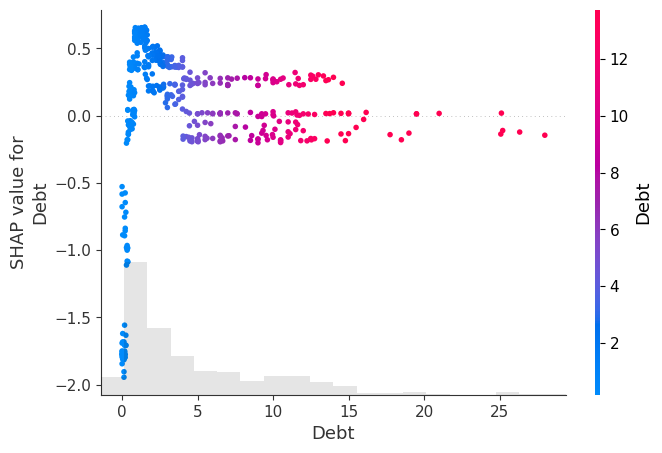

In [62]:
# Scatter plot
# Assuming you want to plot for feature at index 2 and the first class (index 0):
shap.plots.scatter(shap_values[:, 2, 0], color=shap_values[:, 2, 0])

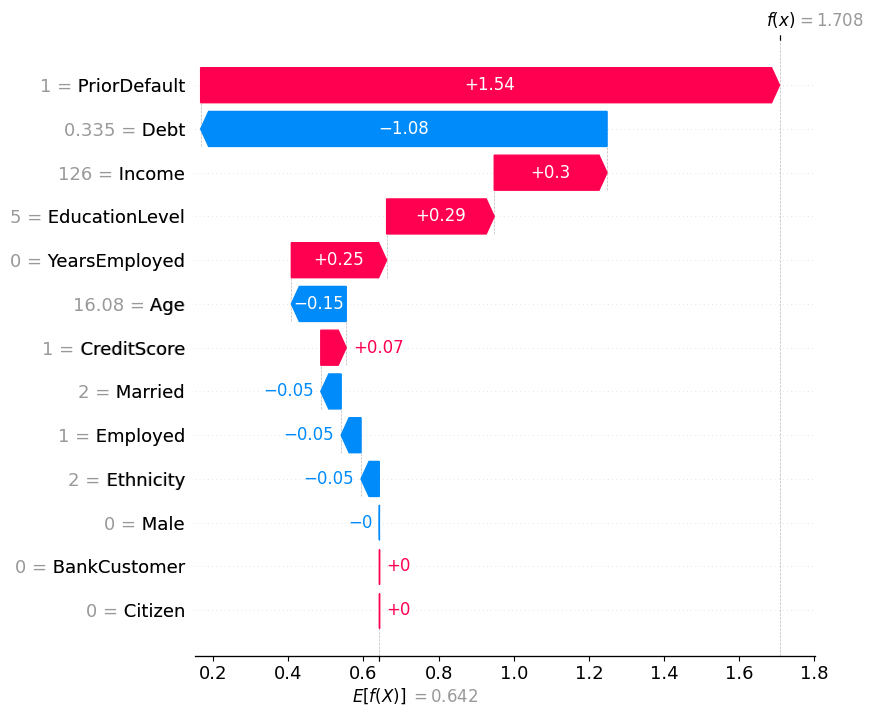

In [63]:
# Assuming it is a binary classification problem, select the first output class (index 0)
shap.waterfall_plot(shap_values[0, :, 0], max_display=13)

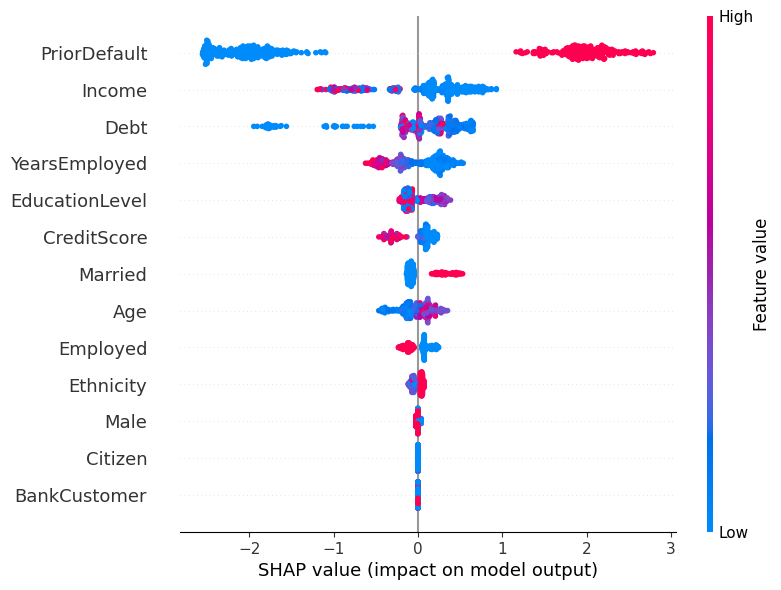

In [64]:
# Select the SHAP values for the first class (assuming binary classification)
shap_values_class0 = shap_values[:, :, 0]

# Create the beeswarm plot for the first class
shap.plots.beeswarm(shap_values_class0, max_display=13)

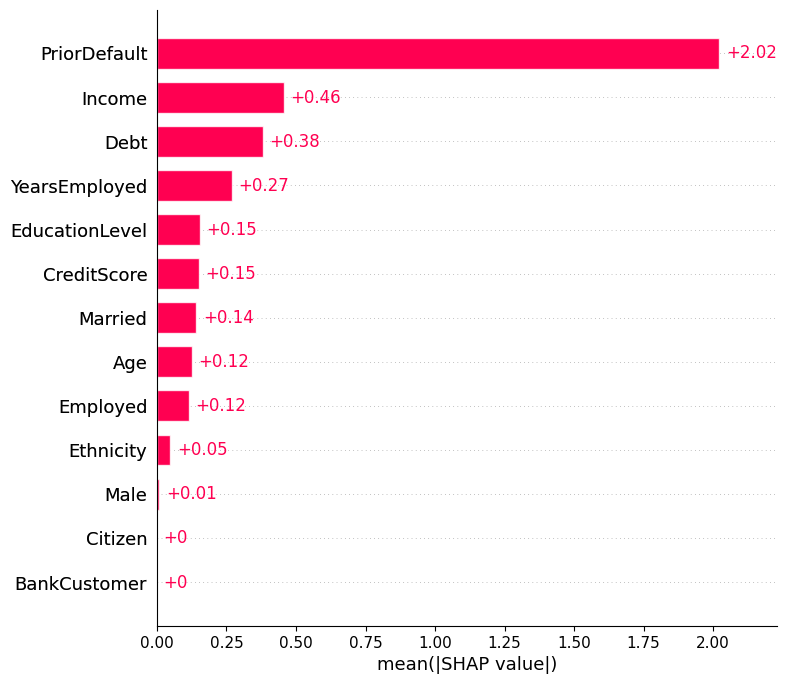

In [65]:
# Bar plot
shap.plots.bar(shap_values[:, :, 0], max_display=13) # Access the first output class of the SHAP values

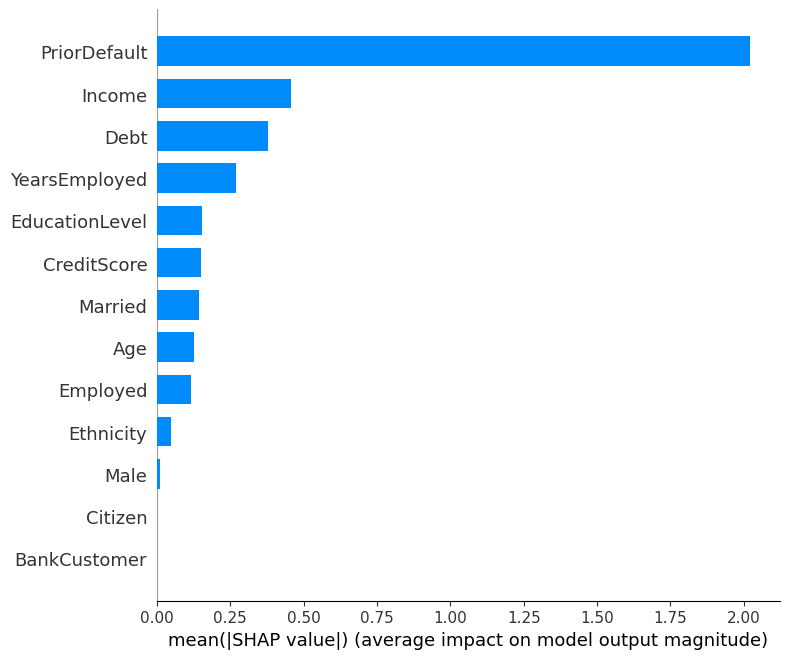

In [66]:
# Summary plot
shap.summary_plot(shap_values=shap_values.values[:, :, 0], features=rescaledX_train, feature_names=features, plot_type='bar', max_display=13) # Pass shap_values.values[:, :, 0], feature_names

In [67]:
# Absolute values plot
def ABS_SHAP(df_shap, df):
    """
    Replace missing values in categorical colums with their most frequent value
    """
    # Select SHAP values for the first class (assuming binary classification)
    df_shap = df_shap[:, :, 0]  # Select values for the first class

    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index', axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list), pd.Series(corr_list)], axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns = ['Variable', 'Corr']
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'Positive', 'Negative')

# 4. Analysis of Selected Samples

In [68]:
X_te.isna().sum().sum()

0

## Case 1: Both bank and model approved credit card request

In [69]:
# List all applicants with non-zero income where both the bank and model approved the credit card request
X_te[(X_te['Income'] != 0) & (X_te['Decision'] == 1) & (X_te['Prediction'] == 1)].iloc[:,:]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Decision,Prediction
1,1.0,40.25,21.500,2.0,0.0,4.0,9.0,20.000,0.0,1.0,11.0,0.0,1200.0,1.0,1.0
3,1.0,41.75,0.960,2.0,0.0,14.0,8.0,2.500,0.0,0.0,0.0,0.0,600.0,1.0,1.0
5,1.0,25.17,3.500,2.0,0.0,2.0,8.0,0.625,0.0,1.0,7.0,0.0,7059.0,1.0,1.0
7,0.0,28.67,1.040,2.0,0.0,1.0,8.0,2.500,0.0,1.0,5.0,0.0,1430.0,1.0,1.0
9,1.0,56.00,12.500,2.0,0.0,8.0,3.0,8.000,0.0,0.0,0.0,0.0,2028.0,1.0,1.0
12,1.0,34.08,0.080,3.0,3.0,9.0,0.0,0.040,0.0,1.0,1.0,0.0,2000.0,1.0,1.0
15,0.0,47.42,8.000,2.0,0.0,4.0,0.0,6.500,0.0,1.0,6.0,0.0,51100.0,1.0,1.0
16,1.0,23.92,1.500,2.0,0.0,3.0,3.0,1.875,0.0,1.0,6.0,0.0,327.0,1.0,1.0
18,1.0,39.50,4.250,2.0,0.0,1.0,0.0,6.500,0.0,1.0,16.0,0.0,1210.0,1.0,1.0
19,1.0,29.92,1.835,2.0,0.0,1.0,3.0,4.335,0.0,0.0,0.0,0.0,200.0,1.0,1.0


In [70]:
# Select an applicant for Case 1 based on the above tabular results
index1 = 1

In [71]:
# Display the feature values for the selected applicant
X_te.iloc[index1,:]

,1
Male,1.00
Age,40.25
Debt,21.50
Married,2.00
BankCustomer,0.00
EducationLevel,4.00
Ethnicity,9.00
YearsEmployed,20.00
PriorDefault,0.00
Employed,1.00


In [72]:
v = X_te.iloc[index1,:13].values

In [73]:
v

array([1.000e+00, 4.025e+01, 2.150e+01, 2.000e+00, 0.000e+00, 4.000e+00,
       9.000e+00, 2.000e+01, 0.000e+00, 1.000e+00, 1.100e+01, 0.000e+00,
       1.200e+03])

In [74]:
shap_values_approved = lgb_explainer(np.array([v]))[0] # Convert v to a NumPy array

In [75]:
shap_values_approved

.values =
array([[-0.02550672,  0.02550672],
       [-0.02168349,  0.02168349],
       [ 0.0145806 , -0.0145806 ],
       [-0.11534376,  0.11534376],
       [ 0.        ,  0.        ],
       [ 0.06834644, -0.06834644],
       [ 0.02939068, -0.02939068],
       [-0.47781339,  0.47781339],
       [-2.52771611,  2.52771611],
       [-0.12226456,  0.12226456],
       [-0.31586798,  0.31586798],
       [ 0.        ,  0.        ],
       [-0.76540572,  0.76540572]])

.base_values =
array([ 0.64234963, -0.64234963])

.data =
array([1.000e+00, 4.025e+01, 2.150e+01, 2.000e+00, 0.000e+00, 4.000e+00,
       9.000e+00, 2.000e+01, 0.000e+00, 1.000e+00, 1.100e+01, 0.000e+00,
       1.200e+03])

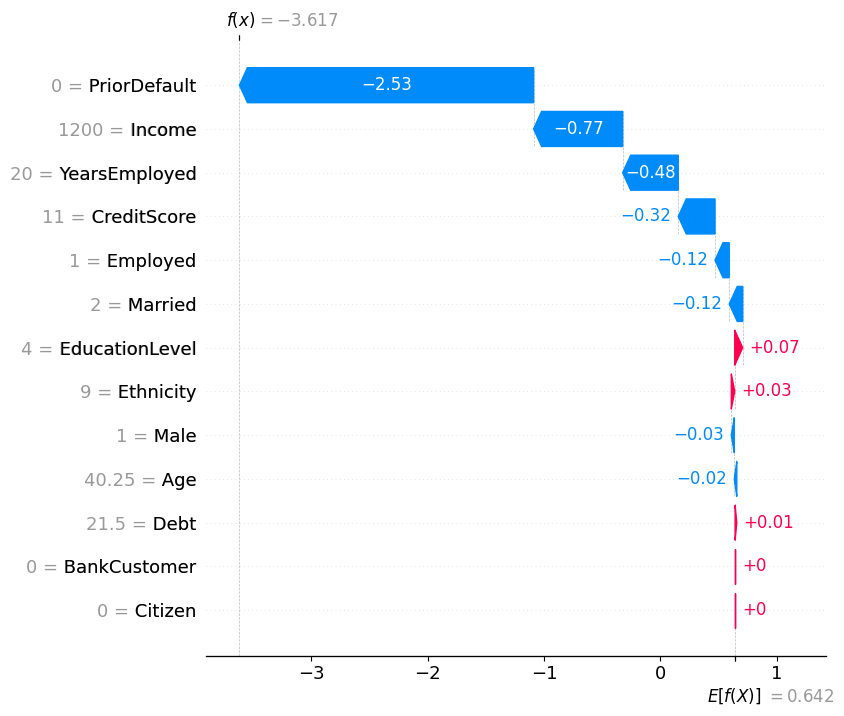

In [76]:
# Waterfall plot
shap.waterfall_plot(shap_values_approved[:, 0], max_display=13)  # Access the first instance's explanation for the first class

## Case 2: Both bank and model declined the credit card request

In [77]:
# List all applicants with non-zero income where both the bank and model declined the credit card request
X_te[(X_te['Income'] != 0) & (X_te['Decision'] == 0) & (X_te['Prediction'] == 0)].iloc[:,:]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Decision,Prediction
2,1.0,29.830000,2.040,3.0,3.0,14.0,3.0,0.040,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17,0.0,23.000000,1.835,2.0,0.0,7.0,4.0,0.000,1.0,1.0,1.0,0.0,53.0,0.0,0.0
21,1.0,27.830000,1.500,2.0,0.0,13.0,8.0,2.250,1.0,1.0,1.0,0.0,3.0,0.0,0.0
22,1.0,37.330000,2.665,2.0,0.0,2.0,8.0,0.165,1.0,0.0,0.0,0.0,501.0,0.0,0.0
26,1.0,19.420000,1.500,3.0,3.0,2.0,8.0,2.000,0.0,0.0,0.0,0.0,20.0,0.0,0.0
29,1.0,19.500000,0.290,2.0,0.0,8.0,8.0,0.290,1.0,0.0,0.0,0.0,364.0,0.0,0.0
30,0.0,16.500000,1.250,2.0,0.0,11.0,8.0,0.250,1.0,1.0,1.0,0.0,98.0,0.0,0.0
32,1.0,19.000000,0.000,3.0,3.0,5.0,2.0,0.000,1.0,1.0,4.0,0.0,1.0,0.0,0.0
33,1.0,21.670000,1.165,3.0,3.0,8.0,8.0,2.500,0.0,1.0,1.0,0.0,20.0,0.0,0.0
37,1.0,62.750000,7.000,2.0,0.0,4.0,9.0,0.000,1.0,0.0,0.0,0.0,12.0,0.0,0.0


In [78]:
# Select an applicant for Case 2 based on the above tabular results
index2 = 2

In [79]:
# Display the feature values for the selected applicant
X_te.iloc[index2,:]

,2
Male,1.00
Age,29.83
Debt,2.04
Married,3.00
BankCustomer,3.00
EducationLevel,14.00
Ethnicity,3.00
YearsEmployed,0.04
PriorDefault,1.00
Employed,0.00


In [80]:
v = X_te.iloc[index2,:13].values

In [81]:
v

array([ 1.  , 29.83,  2.04,  3.  ,  3.  , 14.  ,  3.  ,  0.04,  1.  ,
        0.  ,  0.  ,  0.  ,  1.  ])

In [82]:
shap_values_declined = lgb_explainer(v.reshape(1, -1))  # Reshape v to 2D

In [83]:
shap_values_declined

.values =
array([[[-0.00207865,  0.00207865],
        [ 0.08382088, -0.08382088],
        [ 0.44885294, -0.44885294],
        [ 0.25386366, -0.25386366],
        [ 0.        ,  0.        ],
        [-0.12805777,  0.12805777],
        [-0.06503998,  0.06503998],
        [ 0.13966112, -0.13966112],
        [ 1.85350368, -1.85350368],
        [ 0.07363849, -0.07363849],
        [ 0.09193816, -0.09193816],
        [ 0.        ,  0.        ],
        [ 0.35192363, -0.35192363]]])

.base_values =
array([[ 0.64234963, -0.64234963]])

.data =
array([[ 1.  , 29.83,  2.04,  3.  ,  3.  , 14.  ,  3.  ,  0.04,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ]])

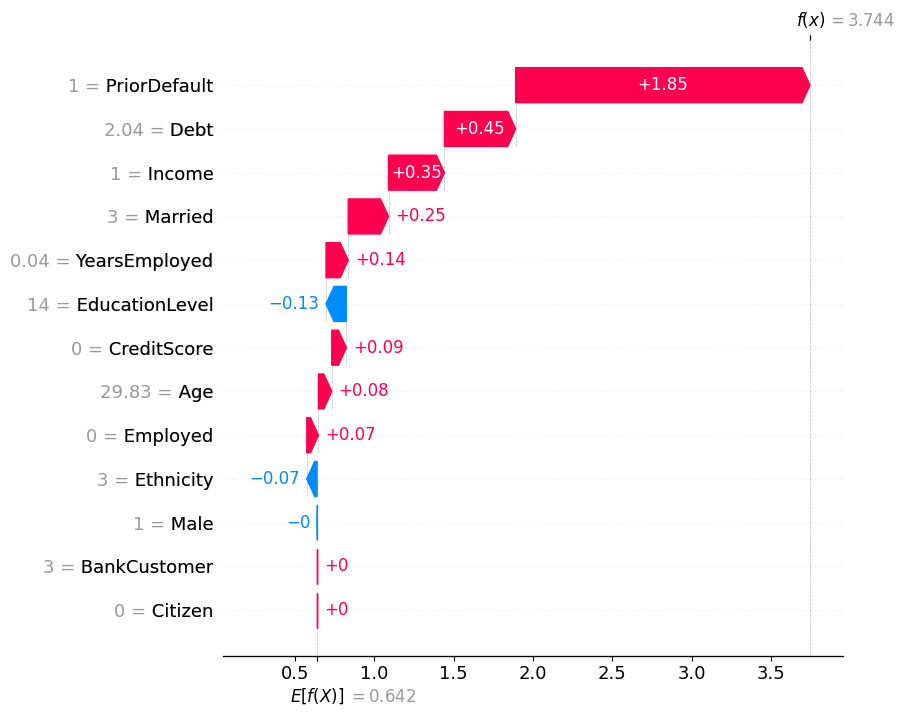

In [84]:
# Waterfall plot
# Assuming it is a binary classification problem, select the first output class (index 0)
shap.waterfall_plot(shap_values_declined[0, :, 0], max_display=13)

## Case 3: Bank approved credit card request, while model rejected it

In [85]:
# List all applicants for which the bank approved their credit card request, while the model rejected it
X_te[(X_te['Decision'] == 1) & (X_te['Prediction'] == 0)].iloc[:,:]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Decision,Prediction
28,1.0,37.58,0.000,1.0,2.0,10.0,5.0,0.000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
34,1.0,44.33,0.500,2.0,0.0,6.0,3.0,5.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,1.0,37.50,1.125,3.0,3.0,3.0,8.0,1.500,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36,0.0,46.67,0.460,2.0,0.0,2.0,3.0,0.415,0.0,1.0,11.0,0.0,6.0,1.0,0.0
47,1.0,48.08,6.040,2.0,0.0,8.0,8.0,0.040,1.0,0.0,0.0,0.0,2690.0,1.0,0.0
51,1.0,44.00,2.000,2.0,0.0,9.0,8.0,1.750,0.0,1.0,2.0,0.0,15.0,1.0,0.0
58,1.0,41.50,1.540,2.0,0.0,6.0,0.0,3.500,1.0,0.0,0.0,0.0,0.0,1.0,0.0
64,0.0,25.75,0.500,2.0,0.0,1.0,3.0,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65,0.0,25.08,2.540,3.0,3.0,0.0,8.0,0.250,0.0,0.0,0.0,0.0,0.0,1.0,0.0
101,1.0,17.50,22.000,0.0,1.0,5.0,7.0,0.000,1.0,0.0,0.0,1.0,100000.0,1.0,0.0


In [86]:
# Select an applicant for Case 3 based on the above tabular results
index3 = 101

In [87]:
# Display the feature values for the selected applicant
X_te.iloc[index3,:]

,101
Male,1.0
Age,17.5
Debt,22.0
Married,0.0
BankCustomer,1.0
EducationLevel,5.0
Ethnicity,7.0
YearsEmployed,0.0
PriorDefault,1.0
Employed,0.0


In [88]:
v = X_te.iloc[index3,:13].values

In [89]:
v

array([1.00e+00, 1.75e+01, 2.20e+01, 0.00e+00, 1.00e+00, 5.00e+00,
       7.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       1.00e+05])

In [90]:
shap_values_approved_declined = lgb_explainer(v.reshape(1, -1)) # Reshape v to 2D

In [91]:
shap_values_approved_declined

.values =
array([[[-0.00449353,  0.00449353],
        [-0.07330591,  0.07330591],
        [ 0.30444998, -0.30444998],
        [-0.05445951,  0.05445951],
        [ 0.        ,  0.        ],
        [ 0.28312693, -0.28312693],
        [ 0.04297207, -0.04297207],
        [ 0.20244743, -0.20244743],
        [ 2.69651674, -2.69651674],
        [ 0.06404221, -0.06404221],
        [ 0.09024938, -0.09024938],
        [ 0.        ,  0.        ],
        [-0.22775343,  0.22775343]]])

.base_values =
array([[ 0.64234963, -0.64234963]])

.data =
array([[1.00e+00, 1.75e+01, 2.20e+01, 0.00e+00, 1.00e+00, 5.00e+00,
        7.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        1.00e+05]])

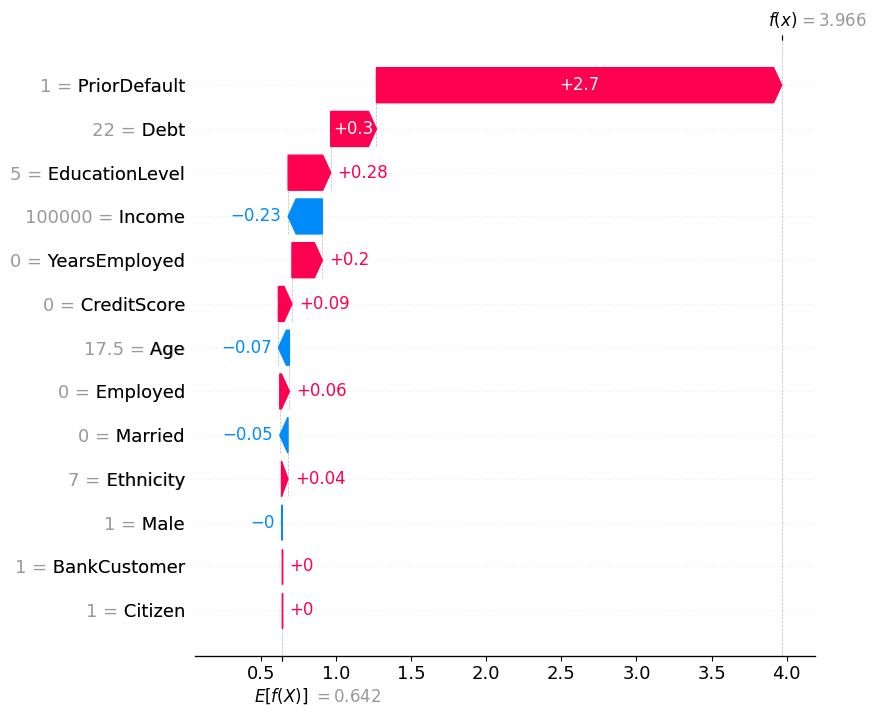

In [92]:
# Waterfall plot
# Select the SHAP values for the desired class (e.g., class 0 for binary classification)
shap.waterfall_plot(shap_values_approved_declined[0, :, 0], max_display=13)  # Access the first instance's explanation for the first class

## Case 4: Bank rejected credit card request, while model approved it

In [93]:
# List all applicants for which the bank rejected their credit card request, while the model approved it
X_te[(X_te['Decision'] == 0) & (X_te['Prediction'] == 1)].iloc[:,:]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Decision,Prediction
25,0.0,25.00,11.00,3.0,3.0,0.0,8.0,4.500,0.0,0.0,0.0,0.0,0.0,0.0,1.0
77,1.0,21.50,9.75,2.0,0.0,1.0,8.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,1.0,37.17,4.00,2.0,0.0,1.0,0.0,5.000,0.0,0.0,0.0,2.0,0.0,0.0,1.0
107,1.0,19.67,10.00,3.0,3.0,8.0,3.0,0.835,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121,0.0,24.58,0.67,2.0,0.0,0.0,3.0,1.750,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155,1.0,18.67,5.00,2.0,0.0,11.0,8.0,0.375,0.0,1.0,2.0,0.0,38.0,0.0,1.0
166,1.0,20.67,5.29,2.0,0.0,11.0,8.0,0.375,0.0,1.0,1.0,0.0,0.0,0.0,1.0
168,1.0,37.50,1.75,3.0,3.0,1.0,0.0,0.250,0.0,0.0,0.0,0.0,400.0,0.0,1.0


In [94]:
# Select an applicant for Case 4 based on the above tabular results
index4 = 166

In [95]:
# Display the feature values for the selected applicant
X_te.iloc[index4,:]

,166
Male,1.000
Age,20.670
Debt,5.290
Married,2.000
BankCustomer,0.000
EducationLevel,11.000
Ethnicity,8.000
YearsEmployed,0.375
PriorDefault,0.000
Employed,1.000


In [96]:
v = X_te.iloc[index4,:13].values

In [97]:
v

array([ 1.   , 20.67 ,  5.29 ,  2.   ,  0.   , 11.   ,  8.   ,  0.375,
        0.   ,  1.   ,  1.   ,  0.   ,  0.   ])

In [98]:
shap_values_declined_approved = lgb_explainer(v.reshape(1, -1)) # Reshape v to 2D

In [99]:
shap_values_declined_approved

.values =
array([[[-0.00331875,  0.00331875],
        [-0.27792862,  0.27792862],
        [-0.13500058,  0.13500058],
        [-0.10605229,  0.10605229],
        [ 0.        ,  0.        ],
        [-0.15124796,  0.15124796],
        [ 0.04055284, -0.04055284],
        [ 0.38575787, -0.38575787],
        [-2.07447113,  2.07447113],
        [-0.14336986,  0.14336986],
        [ 0.0509936 , -0.0509936 ],
        [ 0.        ,  0.        ],
        [ 0.41537371, -0.41537371]]])

.base_values =
array([[ 0.64234963, -0.64234963]])

.data =
array([[ 1.   , 20.67 ,  5.29 ,  2.   ,  0.   , 11.   ,  8.   ,  0.375,
         0.   ,  1.   ,  1.   ,  0.   ,  0.   ]])

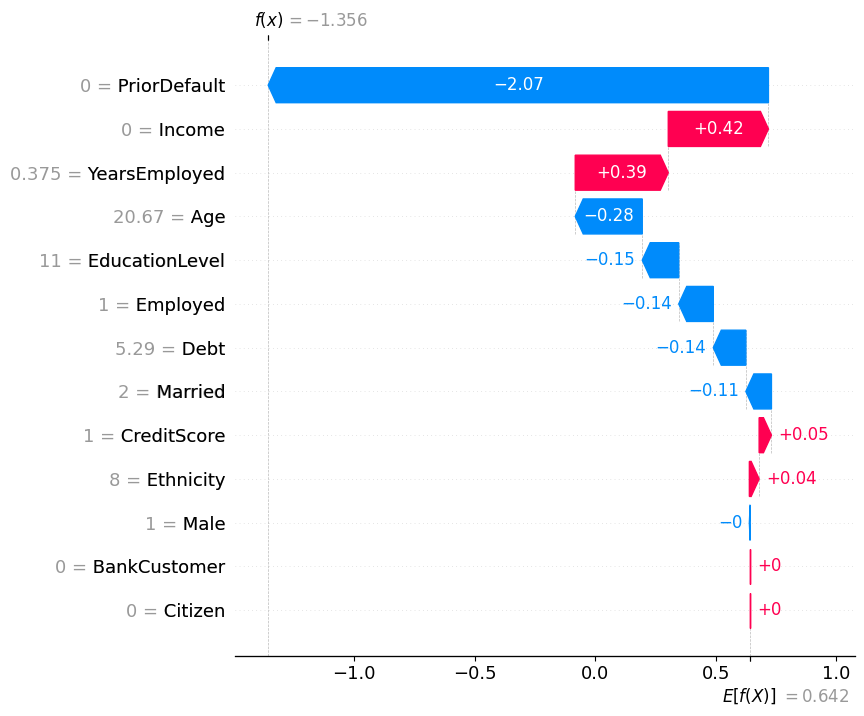

In [100]:
# Waterfall plot
shap.waterfall_plot(shap_values_declined_approved[0, :, 0], max_display=13)  # Access the first instance's explanation for the first class